In [1]:
import pandas as pd #for working with datasets
import numpy as np  #for working with numerical data
import seaborn as sns; sns.set() #for plotting nice graphic plots
import math
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#read raw csv data from file and consider the ts_start cloumn as a datetime column
#cdr_raw would be our dataset which is a Pandas object (dataframe)
cdr_raw = pd.read_csv('sample_cdr.csv', parse_dates=['ts_start'])
#The type of the object
print(type(cdr_raw))

<class 'pandas.core.frame.DataFrame'>


In [3]:
#we represent some records from start of the file
cdr_raw.head()

,id_chiamante,id_cella_start,id_cella_end,durata,ts_start
0,99999999999,PI012U3,PI012U3,52,2012-10-09 10:06:29
1,99999999999,PI016U2,PI016G3,602,2012-10-09 15:02:56
2,99999999999,PI016U2,PI016U2,670,2012-10-09 21:55:18
3,99999999999,PI016U2,PI016G2,509,2012-10-09 22:37:56
4,99999999999,PI016D2,PI016D2,2,2012-10-09 22:49:13


In [4]:
#we represent some records from end of the file
cdr_raw.tail()

,id_chiamante,id_cella_start,id_cella_end,durata,ts_start
374,99999999999,PI016U2,PI016U2,148,2012-11-09 13:46:49
375,99999999999,PI016G2,PI016G2,48,2012-11-09 14:39:04
376,99999999999,PI016U2,PI016U2,898,2012-11-09 14:43:26
377,99999999999,PI016U2,PI016U2,848,2012-11-09 14:58:48
378,99999999999,PI016U2,PI016U2,5,2012-11-09 22:58:26


In [5]:
def checkHour(h):
    if (0 <= h <= 6):
        return "t1" #Night
    elif (7 <= h <= 17):
        return "t2" #Working hours
    else:
        return "t3" #Evening

In [6]:
#to build our matrix we need to add two other columns to the data (weekday and hour in week), like the exam of VA.
#getting the weekday is easy, just check this for our cdr_raw:     cdr_raw["ts_start"].dt.weekday
#or this cdr_raw["ts_start"].dt.hour
cdr_raw['weekday'] = cdr_raw['ts_start'].apply(lambda x: x.weekday())
cdr_raw['hour'] = cdr_raw['ts_start'].apply(lambda x: x.hour)
cdr_raw['t'] = cdr_raw['ts_start'].apply(lambda x: checkHour(x.hour))  # adds t1, t2 or t3 to data
cdr_raw['weekno'] = cdr_raw['ts_start'].apply(lambda x: x.week)  # adds the week number in the year

In [7]:
#Again, we represent some records from start of the file. Now the two columns are added
cdr_raw.head()

,id_chiamante,id_cella_start,id_cella_end,durata,ts_start,weekday,hour,t,weekno
0,99999999999,PI012U3,PI012U3,52,2012-10-09 10:06:29,1,10,t2,41
1,99999999999,PI016U2,PI016G3,602,2012-10-09 15:02:56,1,15,t2,41
2,99999999999,PI016U2,PI016U2,670,2012-10-09 21:55:18,1,21,t3,41
3,99999999999,PI016U2,PI016G2,509,2012-10-09 22:37:56,1,22,t3,41
4,99999999999,PI016D2,PI016D2,2,2012-10-09 22:49:13,1,22,t3,41


In [8]:
#We can get a description of our data based on each column
cdr_raw.describe()

,id_chiamante,durata,weekday,hour,weekno
count,3.790000e+02,379.000000,379.000000,379.000000,379.000000
mean,1.000000e+11,285.912929,2.271768,15.298153,42.875989
std,0.000000e+00,396.100356,1.589489,4.923572,1.239956
min,1.000000e+11,1.000000,0.000000,0.000000,41.000000
25%,1.000000e+11,31.000000,1.000000,10.000000,42.000000
50%,1.000000e+11,114.000000,2.000000,16.000000,43.000000
75%,1.000000e+11,364.000000,4.000000,20.000000,44.000000
max,1.000000e+11,1927.000000,6.000000,23.000000,45.000000


In [9]:
#How many unique users are there in our dataset?
len(cdr_raw.id_chiamante.unique())  #cdr_raw['id_chiamante']

1

In [10]:
#How many unique start cells are there in our dataset?
len(cdr_raw.id_cella_start.unique())

27

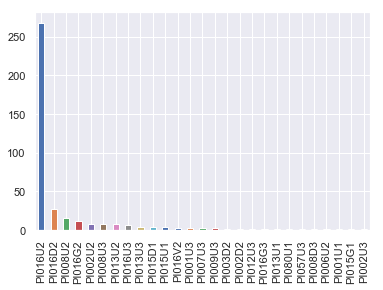

In [11]:
#Histogram of data for each start cell
cdr_raw['id_cella_start'].value_counts().plot(kind='bar')

In [12]:
#How many unique end cells are there in our dataset?
len(cdr_raw.id_cella_end.unique())

35

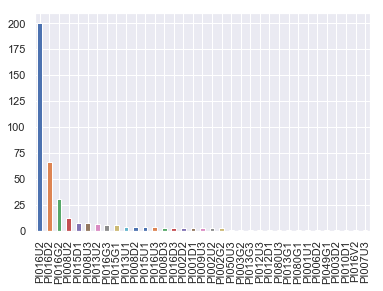

In [13]:
#Histogram of data for each end cell
cdr_raw['id_cella_end'].value_counts().plot(kind='bar')

In [14]:
#Now we want to build another data frame from our cdr_raw and call it cdr_matrix
#Using pivot_table
cdr_matrix = cdr_raw.pivot_table(index=cdr_raw["hour"],columns=cdr_raw["weekday"],aggfunc=len)

In [16]:
#The table is indexed based on "hour" and columned on weekdays (namely 0,1,2,3,4,5,6) and
#aggregated based on len, which means we get the length of each dimension. Actually, it means we get the count
#The aggregated data are for each of the columns of cdr_raw and are duplicate
cdr_matrix.head()

durata                             id_cella_end           ...  \
weekday      0    1    2    3    4   5   6            0    1    2 ...   
hour                                                              ...   
0          NaN  NaN  1.0  NaN  1.0 NaN NaN          NaN  NaN  1.0 ...   
1          NaN  NaN  1.0  NaN  NaN NaN NaN          NaN  NaN  1.0 ...   
6          NaN  NaN  1.0  NaN  NaN NaN NaN          NaN  NaN  1.0 ...   
7          NaN  NaN  4.0  1.0  1.0 NaN NaN          NaN  NaN  4.0 ...   
8          NaN  2.0  3.0  1.0  9.0 NaN NaN          NaN  2.0  3.0 ...   

        ts_start         weekno                              
weekday        4   5   6      0    1    2    3    4   5   6  
hour                                                         
0            1.0 NaN NaN    NaN  NaN  1.0  NaN  1.0 NaN NaN  
1            NaN NaN NaN    NaN  NaN  1.0  NaN  NaN NaN NaN  
6            NaN NaN NaN    NaN  NaN  1.0  NaN  NaN NaN NaN  
7            1.0 NaN NaN    NaN  NaN  4.0  1.0  1.0 NaN NaN  
8            9.0 NaN NaN    NaN  2.0  3.0  1.0  9.0 NaN NaN  

[5 rows x 49 columns]

In [17]:
#To remove duplicates, we select just one column. We can choose any column
cdr_matrix = cdr_matrix["durata"]

In [18]:
cdr_matrix.head()

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN
6,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7,NaN,NaN,4.0,1.0,1.0,NaN,NaN
8,NaN,2.0,3.0,1.0,9.0,NaN,NaN


In [19]:
#Now, this is the matrix and we want to draw heatmap for this.
#This matrix is the heatmap of all weeks, not week by week like the paper. Getting for every week is straightforward.
cdr_matrix = cdr_matrix.fillna(0)

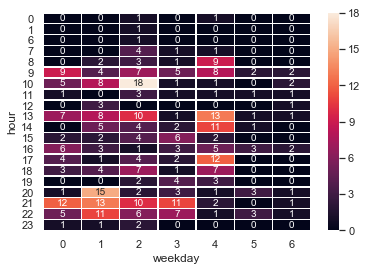

In [20]:
#Now, draw heatmap using sns
#more infor on : https://seaborn.pydata.org/generated/seaborn.heatmap.html
ax = sns.heatmap(cdr_matrix, annot=True, linewidths=.5, xticklabels=1, yticklabels=1)

In [19]:
#Grouping with weeks, so that we can have a feature (such as heatmap or OD graph) for each week

In [21]:
cdr_raw['weekno'].unique()

array([41, 42, 43, 44, 45])

In [22]:
grouped= cdr_raw.groupby('weekno')

In [23]:
grouped.groups.keys()

dict_keys([41, 42, 43, 44, 45])

In [24]:
grouped.get_group(41).head()

,id_chiamante,id_cella_start,id_cella_end,durata,ts_start,weekday,hour,t,weekno
0,99999999999,PI012U3,PI012U3,52,2012-10-09 10:06:29,1,10,t2,41
1,99999999999,PI016U2,PI016G3,602,2012-10-09 15:02:56,1,15,t2,41
2,99999999999,PI016U2,PI016U2,670,2012-10-09 21:55:18,1,21,t3,41
3,99999999999,PI016U2,PI016G2,509,2012-10-09 22:37:56,1,22,t3,41
4,99999999999,PI016D2,PI016D2,2,2012-10-09 22:49:13,1,22,t3,41


In [25]:
numberOfWeeks = len(grouped.groups.keys()) #5
NrCols = 3 # We want to have 3 graphs in each row.
NrRows = math.ceil(numberOfWeeks/NrCols)

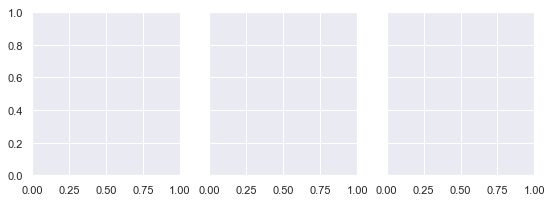

In [26]:
from matplotlib.figure import Figure
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

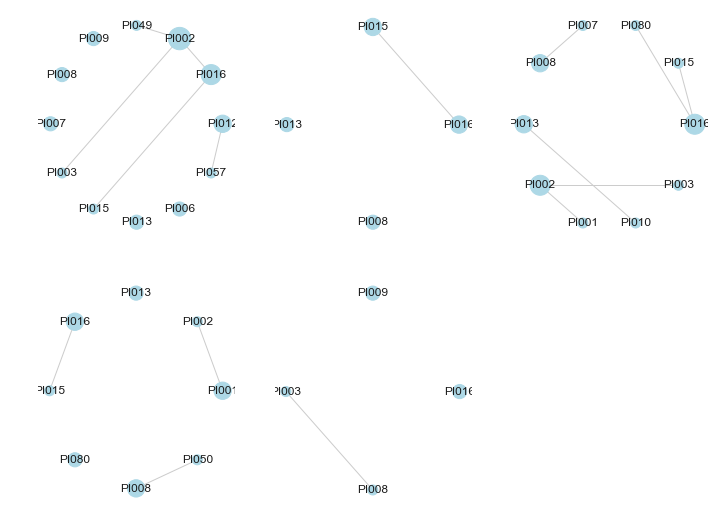

In [27]:
baseNumber = NrRows * 100 + NrCols * 10 + 1
plt.figure(figsize=(12,9))
i = 0
for weekNumber in grouped.groups.keys():
    #print (weekNumber)
    #print(grouped.groups[weekNumber])
    od_matrix = grouped.get_group(weekNumber)[['id_cella_start','id_cella_end']]
    od_matrix['id_cella_start'] = od_matrix['id_cella_start'].apply(lambda x: x[:-2])
    od_matrix['id_cella_end'] = od_matrix['id_cella_end'].apply(lambda x: x[:-2])
    g = nx.from_pandas_edgelist(od_matrix, source='id_cella_start', target='id_cella_end')
    cells = [cell for cell in g.nodes]
    degrees = [g.degree(cell) for cell in g.nodes]
    d = dict(zip(cells, degrees))
    plt.subplot(baseNumber + i)
    layout = nx.shell_layout(g)
    plt.axis('off')
    plt.box(on=True)
    nx.draw_networkx_nodes(g, 
                           layout, 
                           nodelist=d.keys(), 
                           node_size=[v * 100 for v in d.values()], # a LIST of sizes, based on g.degree
                           node_color='lightblue')

    nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

    nx.draw_networkx_labels(g, layout, labels=dict(zip(d.keys(), d.keys())))
    
    i += 1

fig.suptitle("Origin/Destination Matrix")

plt.show()

In [28]:
# The next two cells are just for testing how to build matrix and heatmap

In [29]:
cdr_raw.groupby(['weekday','t']).count()['durata'].unstack().transpose()

weekday,0,1,2,3,4,5,6
t,,,,,,,
t1,NaN,NaN,3.0,NaN,1.0,NaN,NaN
t2,34.0,36.0,58.0,23.0,63.0,8.0,9.0
t3,22.0,44.0,29.0,26.0,14.0,6.0,3.0


In [30]:
cdr_matrixT = cdr_raw.groupby(['weekday', 't']).count()['durata'].unstack().transpose()

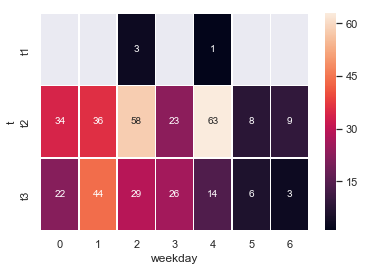

In [31]:
ax = sns.heatmap(cdr_matrixT, annot=True, linewidths=.5, xticklabels=1, yticklabels=1)

In [32]:
# Now we are going to build a heatmap for each week

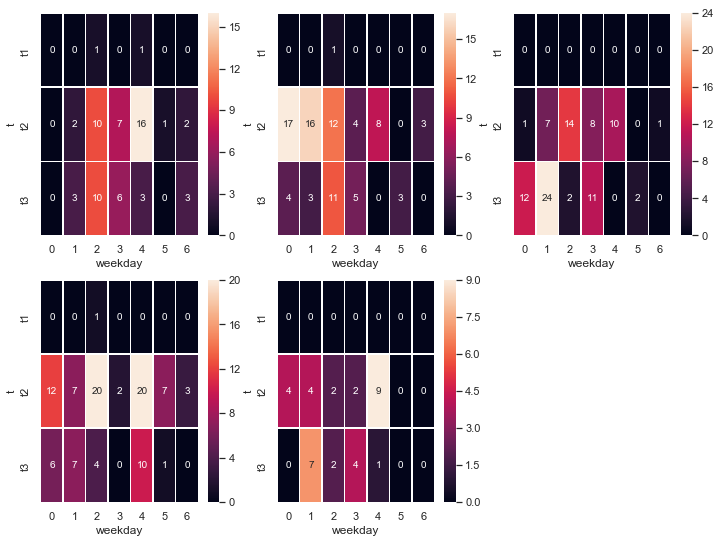

In [33]:
baseNumber = NrRows * 100 + NrCols * 10 + 1
plt.figure(figsize=(12,9))
i = 0
for weekNumber in grouped.groups.keys():
    #print (weekNumber)
    #print(grouped.groups[weekNumber])
    cdr_matrixT = grouped.get_group(weekNumber).groupby(['weekday', 't']).count()['durata'].unstack().transpose()
    cdr_matrixT = cdr_matrixT.fillna(0.0)
    #print(list(cdr_matrixT.columns))
    
    #checking for col differences
    col_diff = set(range(0,7)) - set(cdr_matrixT.columns) #contains the missing columns
    for col in col_diff:
        #print (col) #the missing column
        cdr_matrixT[col] = 0.0 #add the missing column with 0.0 for all rows
    # When we add the missing col, it is appended to the end, so we need to sort the names of the columns
    cdr_matrixT = cdr_matrixT[sorted(cdr_matrixT.columns)]
    
    #checking for row differences
    row_diff = {'t1', 't2', 't3'} - set(cdr_matrixT.index.values) #contains the missing rows
    for row in row_diff:
        #print (row) #the missing row
        cdr_matrixT.loc[row] = 0.0 #add the missing row with 0.0 for all columns
    # When we add the missing col, it is appended to the end, so we need to sort the names of the rows
    cdr_matrixT.sort_index(inplace=True)
    
    #print(cdr_matrixT.loc['t3'])

    sns.heatmap(cdr_matrixT, annot=True, linewidths=.5, xticklabels=1, yticklabels=1, ax=plt.subplot(baseNumber + i))
    i += 1

fig.suptitle("Origin/Destination Matrix")

plt.show()